#Importações de Bibliotecas



In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
import os



In [2]:


# Dicionário de ETFs (regionais, setoriais e temáticos)
etfs = {
    # Américas
    "SPY": "USA (S&P 500)",
    "EWZ": "Brasil",
    "EWC": "Canadá",
    "ECH": "Chile",
    "GXG": "Colômbia",
    "EWW": "México",
    "EPU": "Peru",

    # Europa
    "VGK": "Europa (Geral)",
    "EWG": "Alemanha",
    "EWO": "Áustria",
    "EWK": "Bélgica",
    "EDEN": "Dinamarca",
    "EWQ": "França",
    "GREK": "Grécia",
    "EIRL": "Irlanda",
    "EWI": "Itália",
    "EWN": "Holanda",
    "EPOL": "Polônia",
    "EWP": "Espanha",
    "EWD": "Suécia",
    "EWL": "Suíça",
    "EWU": "Reino Unido",

    # Ásia e Oceania
    "EWA": "Austrália",
    "FXI": "China", # Ou "MCHI" para MSCI China
    "EWH": "Hong Kong",
    "INDA": "Índia",
    "EIDO": "Indonésia",
    "EIS": "Israel",
    "EWJ": "Japão",
    "EWM": "Malásia",
    "EPHE": "Filipinas",
    "KSA": "Arábia Saudita",
    "EWS": "Singapura",
    "EWY": "Coreia do Sul",
    "EWT": "Taiwan",
    "THD": "Tailândia",
    "TUR": "Turquia",
    "UAE": "Emirados Árabes Unidos",
    "VNM": "Vietnã",

    # África
    "EZA": "África do Sul",

    # Regionais / Múltiplos Países
    "EEM": "Mercados Emergentes",
    "VEU": "Mundo (exceto EUA)",
    "ACWI": "Mundo (All Country World Index)",
    "SPDW": "Países Desenvolvidos (exceto EUA)",
}

# Intervalo de tempo
inicio = "2016-01-04"
fim = "2025-07-03"

dados = yf.download(list(etfs.keys()), start=inicio, end=fim, group_by="ticker", auto_adjust=True)
dados.to_csv("etf_paises_1.csv", index=False)



[*********************100%***********************]  44 of 44 completed


In [2]:

# Dicionário de ETFs
etfs = {
    # Américas
    "SPY": "USA (S&P 500)",
    "EWZ": "Brasil",
    "EWC": "Canadá",
    "ECH": "Chile",
    "GXG": "Colômbia",
    "EWW": "México",
    "EPU": "Peru",

    # Europa
    "VGK": "Europa (Geral)",
    "EWG": "Alemanha",
    "EWO": "Áustria",
    "EWK": "Bélgica",
    "EDEN": "Dinamarca",
    "EWQ": "França",
    "GREK": "Grécia",
    "EIRL": "Irlanda",
    "EWI": "Itália",
    "EWN": "Holanda",
    "EPOL": "Polônia",
    "EWP": "Espanha",
    "EWD": "Suécia",
    "EWL": "Suíça",
    "EWU": "Reino Unido",

    # Ásia e Oceania
    "EWA": "Austrália",
    "FXI": "China", # Ou "MCHI" para MSCI China
    "EWH": "Hong Kong",
    "INDA": "Índia",
    "EIDO": "Indonésia",
    "EIS": "Israel",
    "EWJ": "Japão",
    "EWM": "Malásia",
    "EPHE": "Filipinas",
    "KSA": "Arábia Saudita",
    "EWS": "Singapura",
    "EWY": "Coreia do Sul",
    "EWT": "Taiwan",
    "THD": "Tailândia",
    "TUR": "Turquia",
    "UAE": "Emirados Árabes Unidos",
    "VNM": "Vietnã",

    # África
    "EZA": "África do Sul",

    # Regionais / Múltiplos Países
    "EEM": "Mercados Emergentes",
    "VEU": "Mundo (exceto EUA)",
    "ACWI": "Mundo (All Country World Index)",
    "SPDW": "Países Desenvolvidos (exceto EUA)",
}

# Intervalo de tempo
inicio = "2016-01-04"
fim = "2025-07-03"

# Baixa os dados com preços ajustados
dados = yf.download(list(etfs.keys()), start=inicio, end=fim, group_by="ticker", auto_adjust=True)

# Extrai os preços ajustados de fechamento
precos = pd.DataFrame({ticker: dados[ticker]["Close"] for ticker in etfs})

# Calcula retorno logarítmico diário
retornos = np.log(precos / precos.shift(1)).dropna() # shif

# DataFrame final com as métricas
resumo = pd.DataFrame(columns=["ETF", "Categoria", "Retorno Médio", "Volatilidade", "Skewness", "Kurtosis"])

for ticker, categoria in etfs.items():
    serie = retornos[ticker].dropna()
    resumo.loc[len(resumo)] = [
        ticker,
        categoria,
        serie.mean(),
        serie.std(),
        skew(serie),
        kurtosis(serie, fisher=True)
    ]

# Exibe o resultado
print(resumo)

# Salva para uso posterior
resumo.to_csv("etf_paises_.csv", index=False)


[*********************100%***********************]  44 of 44 completed


     ETF                          Categoria  Retorno Médio  Volatilidade  \
0    SPY                      USA (S&P 500)       0.000539      0.011559   
1    EWZ                             Brasil       0.000356      0.022617   
2    EWC                             Canadá       0.000412      0.012259   
3    ECH                              Chile       0.000133      0.017178   
4    GXG                           Colômbia       0.000172      0.016476   
5    EWW                             México       0.000196      0.016333   
6    EPU                               Peru       0.000512      0.014649   
7    VGK                     Europa (Geral)       0.000325      0.012220   
8    EWG                           Alemanha       0.000311      0.013541   
9    EWO                            Áustria       0.000413      0.014736   
10   EWK                            Bélgica       0.000191      0.012218   
11  EDEN                          Dinamarca       0.000366      0.012161   
12   EWQ    

In [6]:
resumo= pd.read_csv("etf_paises_.csv")
resumo.isnull().sum()

,0
ETF,0
Categoria,0
Retorno Médio,0
Volatilidade,0
Skewness,0
Kurtosis,0


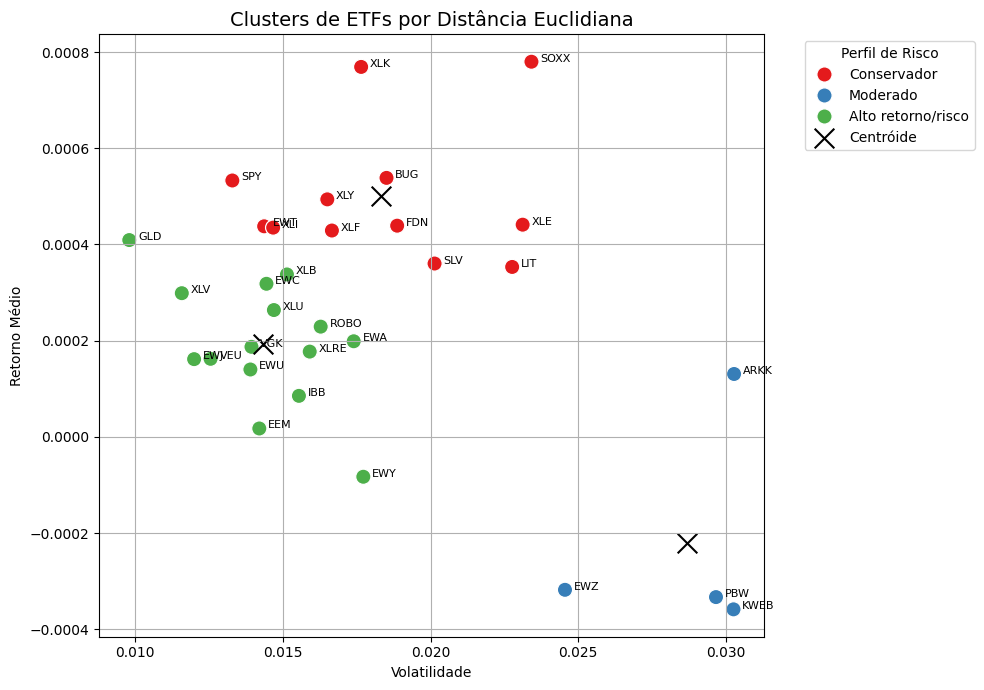

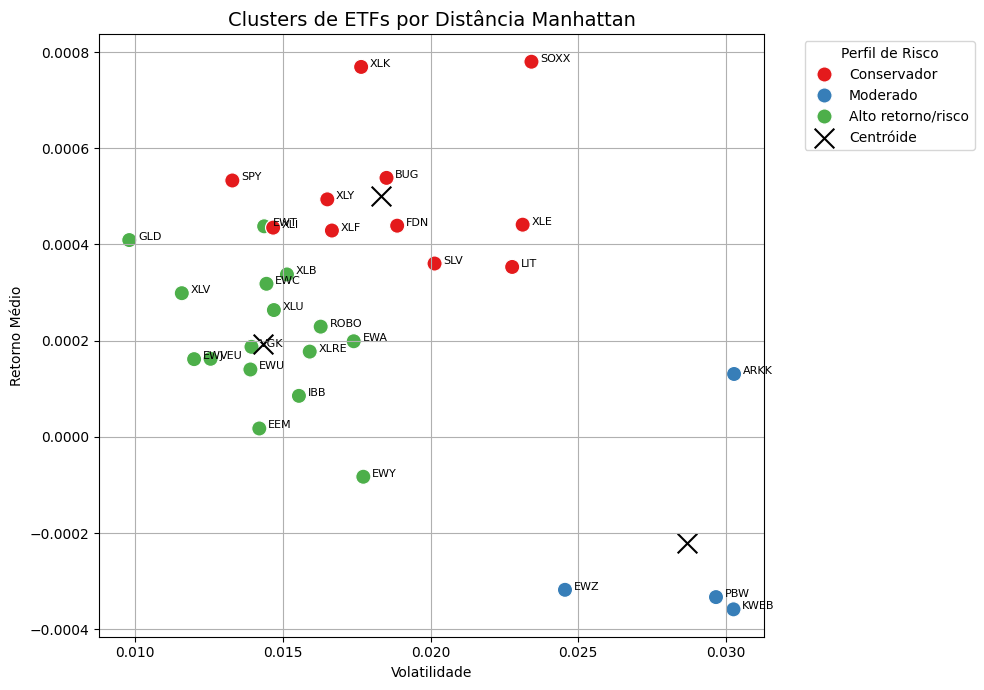

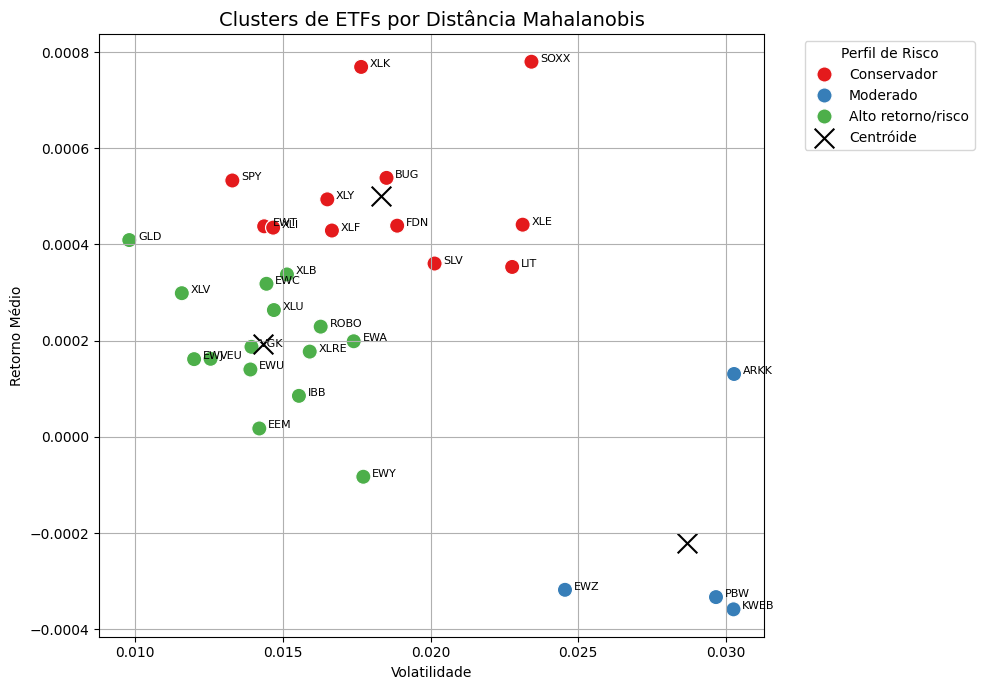

In [27]:
from scipy.spatial.distance import cdist

# Função para calcular Mahalanobis com numpy/scipy
def mahalanobis_dist(X, centroids):
    VI = np.linalg.inv(np.cov(X.T))
    dists = np.zeros((X.shape[0], centroids.shape[0]))
    for i, c in enumerate(centroids):
        dists[:, i] = np.sqrt(np.sum((X - c) @ VI * (X - c), axis=1))
    return dists

dist_types = {
    "Euclidiana": lambda X, centroids: cdist(X, centroids, metric="euclidean"),
    "Manhattan": lambda X, centroids: cdist(X, centroids, metric="cityblock"),
    "Mahalanobis": mahalanobis_dist
}

# Use o mesmo dicionário dos nomes dos clusters do seu KMeans principal (ajuste conforme o seu)
cluster_names = {
    0: "Conservador",
    1: "Moderado",
    2: "Alto retorno/risco"
}

# Paleta padronizada, a mesma do gráfico principal (Set1)
palette = sns.color_palette("Set1", n_colors=len(cluster_names))

for dist_name, dist_func in dist_types.items():
    dists = dist_func(X_scaled, kmeans_final.cluster_centers_)
    cluster_pred = np.argmin(dists, axis=1)
    # Mapear para nomes dos clusters
    cluster_pred_nome = pd.Series(cluster_pred).map(cluster_names)

    sorted_names = [cluster_names[i] for i in sorted(cluster_names)]
    color_dict = dict(zip(sorted_names, palette))

    plt.figure(figsize=(10,7))
    sns.scatterplot(
        x=X["Volatilidade"], y=X["Retorno Médio"],
        hue=cluster_pred_nome,
        palette=color_dict, s=120
    )
    for i in range(len(df)):
        plt.text(X["Volatilidade"].iloc[i]+0.0003, X["Retorno Médio"].iloc[i], df["ETF"].iloc[i], fontsize=8)
    # Centrós
    centroids_inv = scaler.inverse_transform(kmeans_final.cluster_centers_)
    plt.scatter(
        centroids_inv[:, 1], centroids_inv[:, 0], s=200, c="black", marker="x", label="Centróide"
    )
    plt.title(f"Clusters de ETFs por Distância {dist_name}", fontsize=14)
    plt.xlabel("Volatilidade")
    plt.ylabel("Retorno Médio")
    plt.legend(title="Perfil de Risco", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

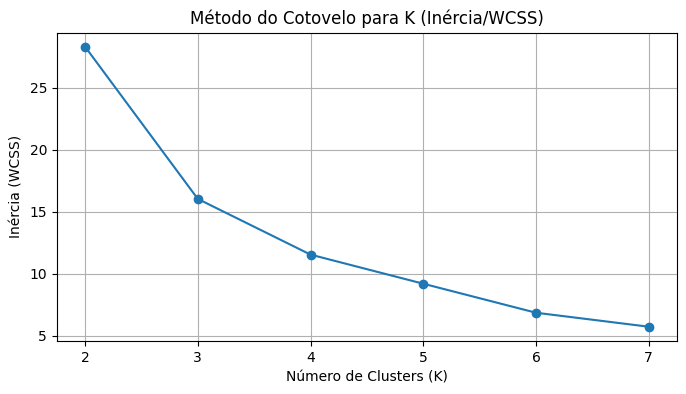

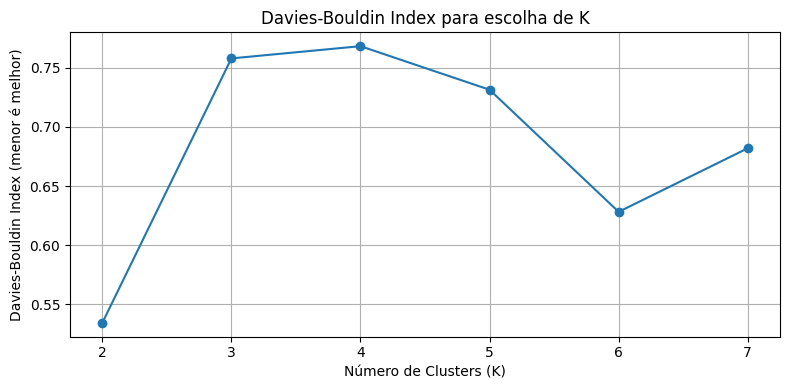

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o DataFrame 'df'
df = pd.read_csv("etf_features_.csv")

# 1. Use apenas Retorno Médio e Volatilidade
X = df[["Retorno Médio", "Volatilidade"]].copy()

# 2. Padronize os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Teste K entre 2 e 8 clusters para INÉRCIA (WCSS – método do cotovelo)
inertia_scores = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

# 4. Teste K entre 2 e 8 clusters para Davies-Bouldin Index
dbi_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(dbi)

# 5. Visualize o "cotovelo" (Inércia)
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), inertia_scores, marker='o')
plt.title("Método do Cotovelo para K (Inércia/WCSS)")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia (WCSS)")
plt.grid(True)
plt.show()

# 6. Visualização do Davies-Bouldin Index
plt.figure(figsize=(8, 4))
plt.plot(list(K_range), dbi_scores, marker='o')
plt.title("Davies-Bouldin Index para escolha de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Davies-Bouldin Index (menor é melhor)")
plt.grid(True)
plt.tight_layout()
plt.savefig("db_index_etfs.png", dpi=300)
plt.show()

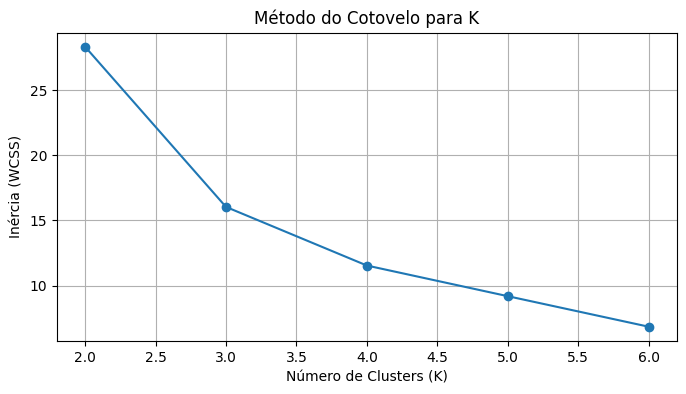

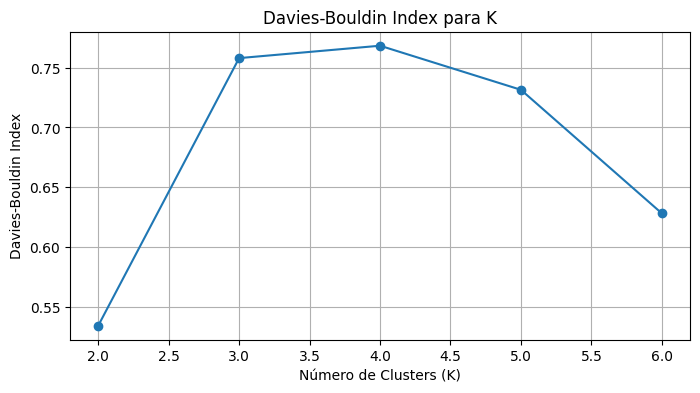

Cluster 0: Retorno Médio=0.00050, Volatilidade=0.01833
Cluster 1: Retorno Médio=-0.00022, Volatilidade=0.02869
Cluster 2: Retorno Médio=0.00019, Volatilidade=0.01434


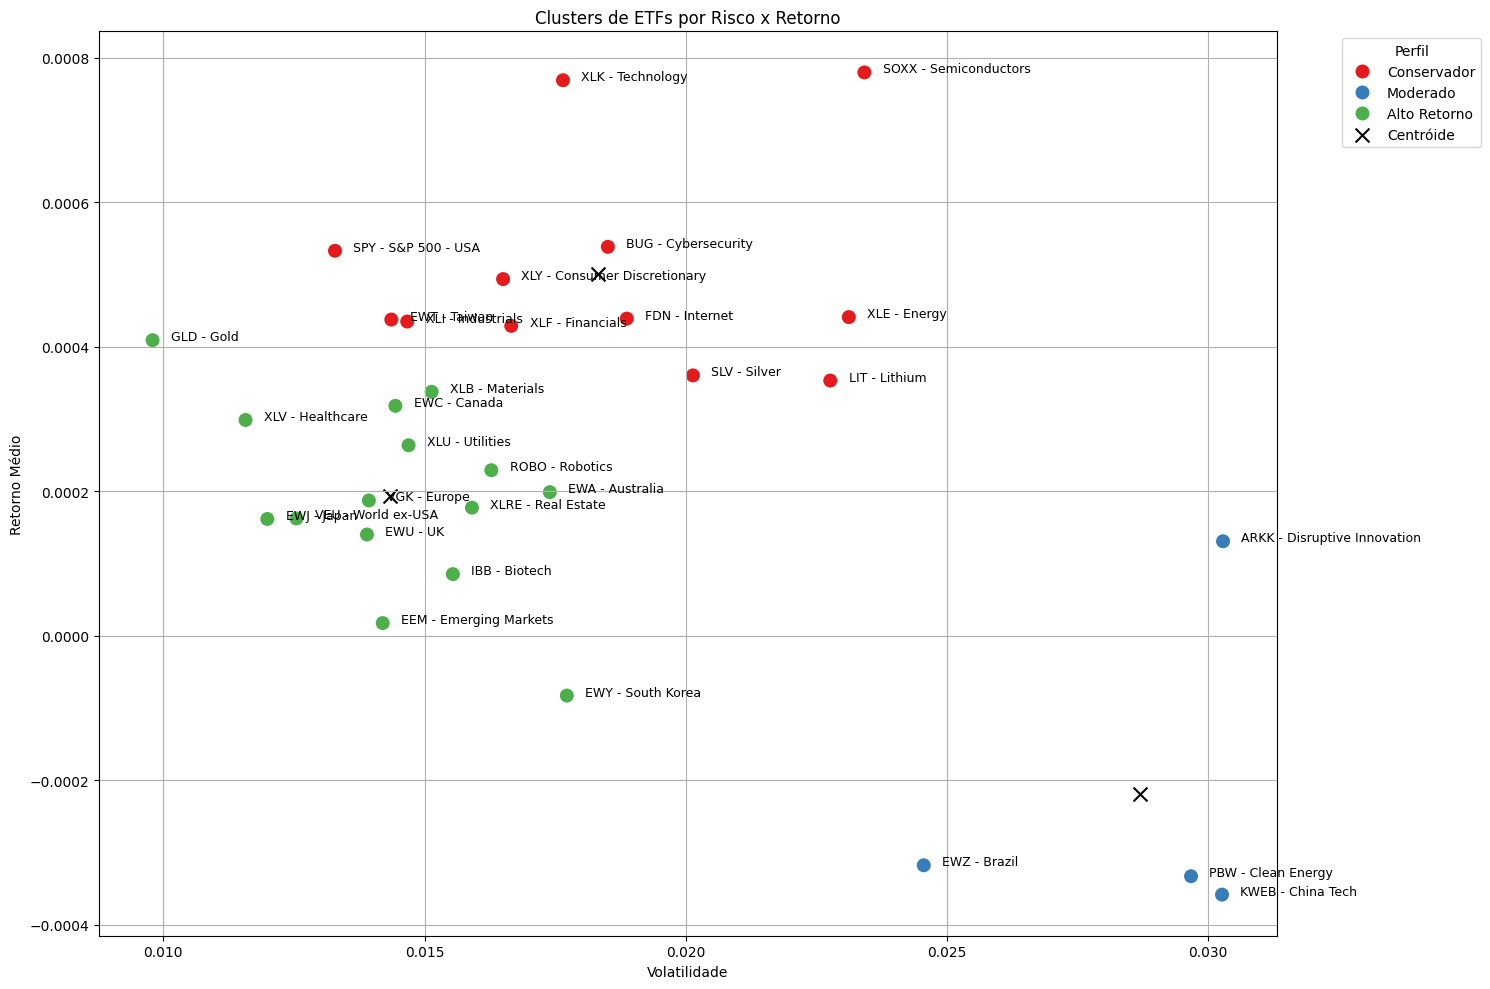

     ETF                     Categoria  Retorno Médio  Volatilidade  \
15   XLV              XLV - Healthcare       0.000299      0.011574   
27   GLD                    GLD - Gold       0.000409      0.009794   
21   IBB                 IBB - Biotech       0.000085      0.015542   
19   XLU               XLU - Utilities       0.000264      0.014694   
18   XLB               XLB - Materials       0.000338      0.015136   
17  XLRE            XLRE - Real Estate       0.000177      0.015907   
10   EWY             EWY - South Korea      -0.000083      0.017724   
8    EWA               EWA - Australia       0.000199      0.017399   
30  ROBO               ROBO - Robotics       0.000229      0.016279   
3    VEU            VEU - World ex-USA       0.000162      0.012548   
6    EWU                      EWU - UK       0.000140      0.013898   
2    EEM        EEM - Emerging Markets       0.000017      0.014200   
7    EWC                  EWC - Canada       0.000318      0.014442   
5    E

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


categoria_detalhada = {
    "SPY": "S&P 500 - USA",
    "EWZ": "Brazil ",
    "EEM": "Emerging Markets",
    "VEU": "World ex-USA",
    "VGK": "Europe",
    "EWJ": "Japan",
    "EWU": "UK",
    "EWC": "Canada",
    "EWA": "Australia",
    "EWT": "Taiwan",
    "EWY": "South Korea",
    "XLF": "Financials",
    "XLK": "Technology",
    "XLE": "Energy",
    "XLY": "Consumer Discretionary",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLRE": "Real Estate",
    "XLB": "Materials",
    "XLU": "Utilities",
    "ARKK": "Disruptive Innovation",
    "IBB": "Biotech",
    "SOXX": "Semiconductors",
    "LIT": "Lithium",
    "PBW": "Clean Energy",
    "KWEB": "China Tech",
    "FDN": "Internet",
    "GLD": "Gold",
    "SLV": "Silver",
    "BUG": "Cybersecurity",
    "ROBO": "Robotics"
}


# Carregar dados
df = pd.read_csv("etf_features_.csv")
df["Categoria"] = df["ETF"].map(lambda x: f"{x} - {categoria_detalhada.get(x, 'Desconhecido')}")

# 1. Use apenas Retorno Médio e Volatilidade
X = df[["Retorno Médio", "Volatilidade"]].copy()

# 2. Padronize os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Encontrando o melhor K (Elbow + Davies-Bouldin)
from sklearn.metrics import davies_bouldin_score

scores_inertia = []
scores_db = []
K_range = range(2, 7)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    scores_inertia.append(kmeans.inertia_)
    scores_db.append(davies_bouldin_score(X_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(list(K_range), scores_inertia, marker='o')
plt.title("Método do Cotovelo para K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia (WCSS)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(list(K_range), scores_db, marker='o')
plt.title("Davies-Bouldin Index para K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.show()

# 4. Escolha K final
K_final = 4
kmeans_final = KMeans(n_clusters=K_final, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(X_scaled)

# 5. Nomeie os clusters de acordo com os centróides (ajuste conforme o seu agrupamento)
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
for i, c in enumerate(centroids):
    print(f"Cluster {i}: Retorno Médio={c[0]:.5f}, Volatilidade={c[1]:.5f}")

# Ajuste os nomes dos perfis conforme análise dos centróides!
nomes = {
    0: "Conservador",
    1: "Moderado",
    2: "Alto Retorno"
}
df["Perfil"] = df["Cluster"].map(nomes)

# 6. Visualize agrupamento com centroides e categorias
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=df, x="Volatilidade", y="Retorno Médio",
    hue="Perfil", palette="Set1", s=120,
)
for i in range(len(df)):
    nome_etf = df["ETF"].iloc[i]
    nome_cat = categoria_detalhada[nome_etf]  # dicionário
    plt.text(
        df["Volatilidade"].iloc[i]+0.00035,
        df["Retorno Médio"].iloc[i],
        f"{nome_etf} - {nome_cat}",
        fontsize=9
    )



# Plotar os centróides
plt.scatter(
    centroids[:, 1], centroids[:, 0],
    s=100, c="black", marker="x", label="Centróide"
)
plt.title("Clusters de ETFs por Risco x Retorno")
plt.xlabel("Volatilidade")
plt.ylabel("Retorno Médio")
plt.legend(title="Perfil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Exiba a tabela final
print(df[["ETF", "Categoria", "Retorno Médio", "Volatilidade", "Perfil"]].sort_values("Perfil"))


 Centróides:
Cluster 0: Retorno Médio = 0.00014, Volatilidade = 0.01492
Cluster 1: Retorno Médio = -0.00022, Volatilidade = 0.02869
Cluster 2: Retorno Médio = 0.00041, Volatilidade = 0.01405
Cluster 3: Retorno Médio = 0.00053, Volatilidade = 0.02064


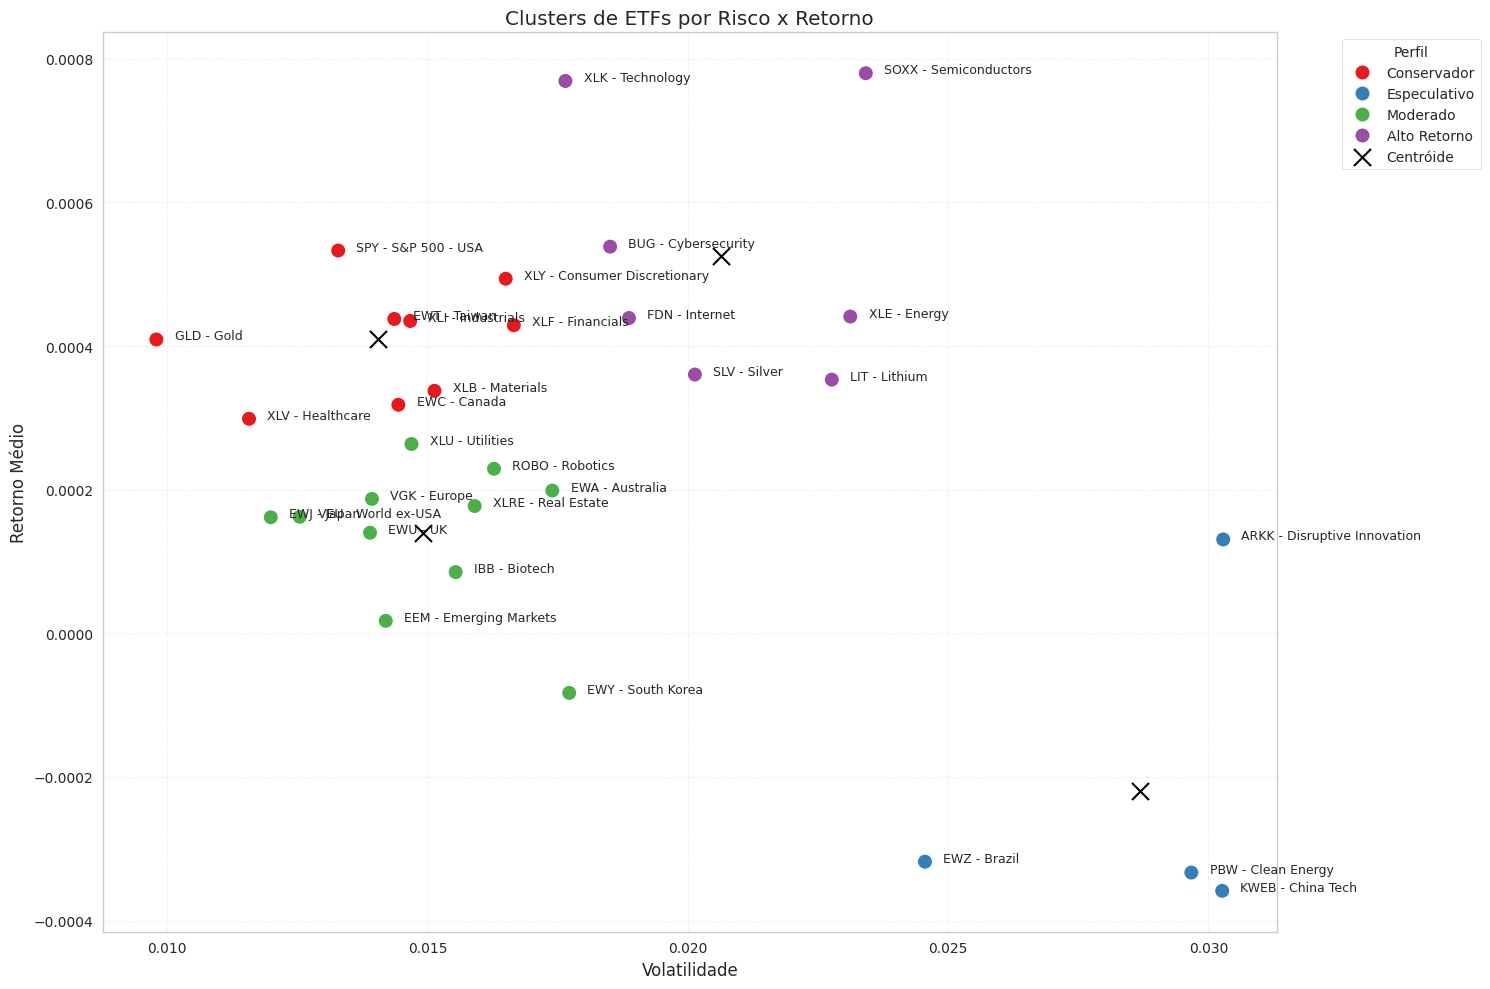


 Tabela Final:
     ETF                     Categoria  ...  Volatilidade        Perfil
28   SLV                  SLV - Silver  ...      0.020137  Alto Retorno
26   FDN                FDN - Internet  ...      0.018871  Alto Retorno
23   LIT                 LIT - Lithium  ...      0.022766  Alto Retorno
22  SOXX         SOXX - Semiconductors  ...      0.023420  Alto Retorno
29   BUG           BUG - Cybersecurity  ...      0.018509  Alto Retorno
13   XLE                  XLE - Energy  ...      0.023122  Alto Retorno
12   XLK              XLK - Technology  ...      0.017650  Alto Retorno
0    SPY           SPY - S&P 500 - USA  ...      0.013286   Conservador
27   GLD                    GLD - Gold  ...      0.009794   Conservador
18   XLB               XLB - Materials  ...      0.015136   Conservador
16   XLI             XLI - Industrials  ...      0.014669   Conservador
14   XLY  XLY - Consumer Discretionary  ...      0.016504   Conservador
15   XLV              XLV - Healthcare  ...     

In [43]:


# Dicionário de categorias
categoria_detalhada = {
    "SPY": "S&P 500 - USA", "EWZ": "Brazil ", "EEM": "Emerging Markets",
    "VEU": "World ex-USA", "VGK": "Europe", "EWJ": "Japan", "EWU": "UK",
    "EWC": "Canada", "EWA": "Australia", "EWT": "Taiwan", "EWY": "South Korea",
    "XLF": "Financials", "XLK": "Technology", "XLE": "Energy", "XLY": "Consumer Discretionary",
    "XLV": "Healthcare", "XLI": "Industrials", "XLRE": "Real Estate", "XLB": "Materials",
    "XLU": "Utilities", "ARKK": "Disruptive Innovation", "IBB": "Biotech", "SOXX": "Semiconductors",
    "LIT": "Lithium", "PBW": "Clean Energy", "KWEB": "China Tech", "FDN": "Internet",
    "GLD": "Gold", "SLV": "Silver", "BUG": "Cybersecurity", "ROBO": "Robotics"
}

# 1. Carregar dados
df = pd.read_csv("etf_features_.csv")
df["Categoria"] = df["ETF"].map(lambda x: f"{x} - {categoria_detalhada.get(x, 'Desconhecido')}")

# 2. Selecionar colunas de análise
X = df[["Retorno Médio", "Volatilidade"]].copy()

# 3. Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Clusterização com K=4
K_final = 4
kmeans = KMeans(n_clusters=K_final, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# 5. Analisar centróides
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

print("\n Centróides:")
for i, (ret, vol) in enumerate(centroids):
    print(f"Cluster {i}: Retorno Médio = {ret:.5f}, Volatilidade = {vol:.5f}")

# 6. Nomear clusters com base nos centróides
# Ordenar clusters por risco (volatilidade crescente)
ordem_clusters = sorted(
    [(i, vol) for i, (_, vol) in enumerate(centroids)],
    key=lambda x: x[1]
)
perfil_map = {
    ordem_clusters[0][0]: "Conservador",
    ordem_clusters[1][0]: "Moderado",
    ordem_clusters[2][0]: "Alto Retorno",
    ordem_clusters[3][0]: "Especulativo"
}
df["Perfil"] = df["Cluster"].map(perfil_map)

# 7. Visualizar agrupamento
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df, x="Volatilidade", y="Retorno Médio",
    hue="Perfil", palette="Set1", s=120
)

# Adicionar nomes dos ETFs
for i in range(len(df)):
    nome_etf = df["ETF"].iloc[i]
    nome_cat = categoria_detalhada.get(nome_etf, "")
    plt.text(
        df["Volatilidade"].iloc[i] + 0.00035,
        df["Retorno Médio"].iloc[i],
        f"{nome_etf} - {nome_cat}",
        fontsize=9
    )

# Plotar centróides
plt.scatter(
    centroids[:, 1], centroids[:, 0],
    s=150, c="black", marker="x", label="Centróide"
)
plt.title("Clusters de ETFs por Risco x Retorno")
plt.xlabel("Volatilidade")
plt.ylabel("Retorno Médio")
plt.legend(title="Perfil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Tabela final
print("\n Tabela Final:")
print(df[["ETF", "Categoria", "Retorno Médio", "Volatilidade", "Perfil"]].sort_values("Perfil"))


[*********************100%***********************]  31 of 31 completed



--- Análise de Centroides para Mapeamento de Clusters ---
            Retorno_Medio_Cluster  Volatilidade_Cluster
Cluster_ID                                             
2                        0.066701              0.257363
0                        0.135891              0.298898
1                       -0.124697              0.483805
3                       -0.062080              0.484307
--- Fim da Análise de Centroides ---

Mapeamento de Cluster_ID para Perfil (Ajustado Heuristicamente):
{np.float64(2.0): 'Conservador', np.float64(0.0): 'Moderado', np.float64(1.0): 'Especulativo', np.float64(3.0): 'Alta Performance'}
------------------------------------------------------------

Resumo dos Clusters (baseado no Comportamento Diário):
                      Retorno Médio  Volatilidade  ...   Kurtosis  Quantidade
Perfil_Comportamento                               ...                       
Alta Performance          -0.062080      0.484307  ...   1.767460           2
Conservador        

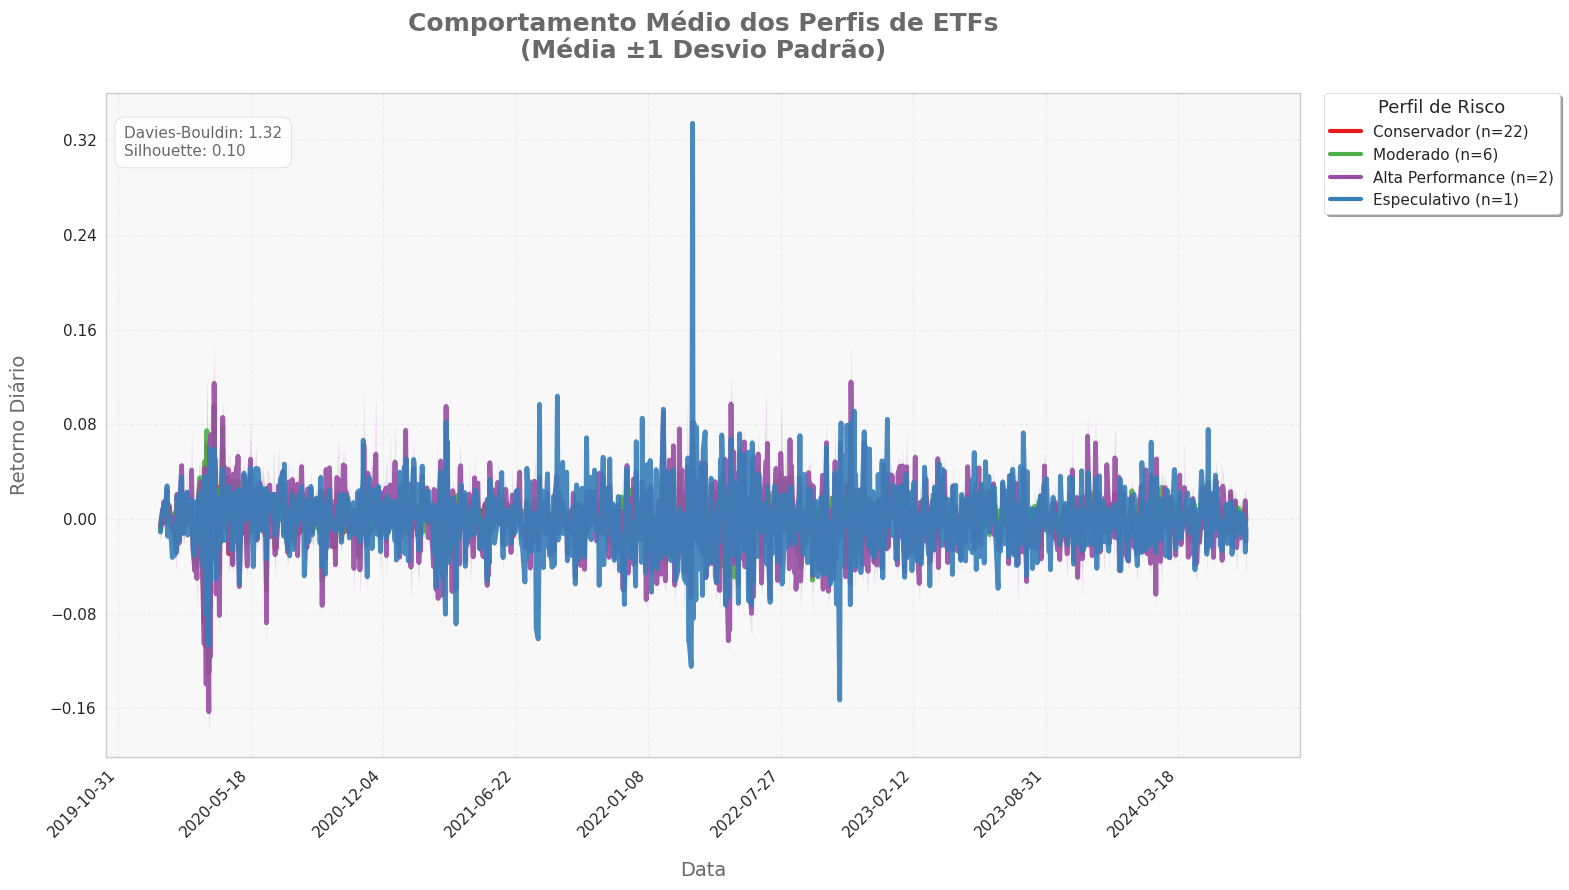

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.ticker as ticker
import os

# 1. Defina os ETFs e suas categorias
etfs = {
    "SPY": "USA",
    "EWZ": "Brazil",
    "EEM": "Emerging Markets",
    "VEU": "World ex-USA",
    "VGK": "Europe",
    "EWJ": "Japan",
    "EWU": "UK",
    "EWC": "Canada",
    "EWA": "Australia",
    "EWT": "Taiwan",
    "EWY": "South Korea",
    "XLF": "Financials",
    "XLK": "Technology",
    "XLE": "Energy",
    "XLY": "Consumer Discretionary",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLRE": "Real Estate",
    "XLB": "Materials",
    "XLU": "Utilities",
    "ARKK": "Disruptive Innovation",
    "IBB": "Biotech",
    "SOXX": "Semiconductors",
    "LIT": "Lithium",
    "PBW": "Clean Energy",
    "KWEB": "China Tech",
    "FDN": "Internet",
    "GLD": "Gold",
    "SLV": "Silver",
    "BUG": "Cybersecurity",
    "ROBO": "Robotics"
}

# 2. Período
inicio = "2020-01-01"
fim = "2024-07-01" # Note que se esta data for executada em um dia futuro, mais dados serão baixados.

# 3. Baixando os preços ajustados
dados = yf.download(list(etfs.keys()), start=inicio, end=fim, group_by="ticker", auto_adjust=True)
precos = pd.DataFrame({ticker: dados[ticker]["Close"] for ticker in etfs})

# 4. Calculando retornos logarítmicos diários
retornos = np.log(precos / precos.shift(1)).dropna()

# 5. Clusterização baseada no comportamento diário (retornos)
retornos_t = retornos.T
scaler_behavior = StandardScaler()
retornos_scaled_behavior = scaler_behavior.fit_transform(retornos_t)

# Definir 4 clusters, como solicitado
n_clusters_comportamento = 4

kmeans_comportamento = KMeans(n_clusters=n_clusters_comportamento, random_state=42, n_init=10)
clusters_comportamento = kmeans_comportamento.fit_predict(retornos_scaled_behavior)



# Criar um DataFrame temporário para inspeção
temp_df = pd.DataFrame({
    "ETF": retornos_t.index,
    "Cluster_ID": clusters_comportamento,
    "Retorno Médio": [retornos[ticker].mean() * 252 for ticker in retornos_t.index], # Anualizando para melhor visualização
    "Volatilidade": [retornos[ticker].std() * np.sqrt(252) for ticker in retornos_t.index] # Anualizando
})

# Calcular os centroides dos clusters em termos de Retorno Médio e Volatilidade
# para ajudar a mapear os IDs aos nomes desejados.
cluster_centroids = temp_df.groupby('Cluster_ID').agg(
    Retorno_Medio_Cluster=('Retorno Médio', 'mean'),
    Volatilidade_Cluster=('Volatilidade', 'mean')
).sort_values(by='Volatilidade_Cluster') # Ordenar por volatilidade para tentar inferir a ordem

print("\n--- Análise de Centroides para Mapeamento de Clusters ---")
print(cluster_centroids)
print("--- Fim da Análise de Centroides ---")



nomes_perfis = ["Conservador", "Moderado", "Alta Performance", "Especulativo"]
# Cores para os perfis, conforme solicitado:
# vermelho - conservador
# verde - moderado
# lilas - alto retorno (alta performance)
# azul - especulativo (alto risco)
cores_perfis = {
    "Conservador": "#e41a1c",      # Vermelho
    "Moderado": "#4daf4a",         # Verde
    "Alta Performance": "#984ea3", # Lilás
    "Especulativo": "#377eb8"      # Azul
}


sorted_cluster_ids = cluster_centroids.sort_values(by=['Volatilidade_Cluster', 'Retorno_Medio_Cluster']).index.tolist()



cluster_id_to_perfil = {}

sorted_cluster_data = cluster_centroids.reset_index().sort_values(by=['Volatilidade_Cluster', 'Retorno_Medio_Cluster'])

# Conservador (menor volatilidade, menor retorno)
cluster_id_to_perfil[sorted_cluster_data.iloc[0]['Cluster_ID']] = "Conservador"

# Moderado (volatilidade intermediária)
cluster_id_to_perfil[sorted_cluster_data.iloc[1]['Cluster_ID']] = "Moderado"

# Os dois restantes são de alta volatilidade. Precisamos distingui-los pelo retorno.
remaining_clusters = sorted_cluster_data.iloc[2:].sort_values(by='Retorno_Medio_Cluster')

# Especulativo (alta volatilidade, retorno mais baixo/negativo entre os de alto risco)
cluster_id_to_perfil[remaining_clusters.iloc[0]['Cluster_ID']] = "Especulativo"

# Alta Performance (alta volatilidade, retorno mais alto entre os de alto risco)
cluster_id_to_perfil[remaining_clusters.iloc[1]['Cluster_ID']] = "Alta Performance"

print("\nMapeamento de Cluster_ID para Perfil (Ajustado Heuristicamente):")
print(cluster_id_to_perfil)
print("-" * 60)




resumo_comportamento = pd.DataFrame({
    "ETF": retornos_t.index,
    "Cluster_ID": clusters_comportamento
})


resumo_comportamento["Perfil_Comportamento"] = resumo_comportamento["Cluster_ID"].map(cluster_id_to_perfil)
resumo_comportamento["Categoria"] = [etfs[ticker] for ticker in resumo_comportamento["ETF"]]


resumo_comportamento["Retorno Médio"] = [retornos[ticker].mean() * 252 for ticker in resumo_comportamento["ETF"]]
resumo_comportamento["Volatilidade"] = [retornos[ticker].std() * np.sqrt(252) for ticker in resumo_comportamento["ETF"]]

resumo_comportamento["Skewness"] = [skew(retornos[ticker].dropna()) for ticker in resumo_comportamento["ETF"]]
resumo_comportamento["Kurtosis"] = [kurtosis(retornos[ticker].dropna(), fisher=True) for ticker in resumo_comportamento["ETF"]]

# 8. Resumo dos clusters
print("\nResumo dos Clusters (baseado no Comportamento Diário):")
print(resumo_comportamento.groupby('Perfil_Comportamento').agg({
    'Retorno Médio': 'mean',
    'Volatilidade': 'mean',
    'Skewness': 'mean',
    'Kurtosis': 'mean',
    'ETF': 'count'
}).rename(columns={'ETF': 'Quantidade'}))

print("\nComposição dos Clusters (baseado no Comportamento Diário):")
for perfil in nomes_perfis: # Itera sobre os nomes dos perfis definidos
    print(f"\nPerfil: {perfil}")
    print(resumo_comportamento[resumo_comportamento["Perfil_Comportamento"] == perfil][['ETF', 'Categoria', 'Retorno Médio', 'Volatilidade']].to_string(index=False))
print("="*60)

#  Plot do comportamento médio dos clusters
plt.figure(figsize=(18, 9))
sns.set_style("whitegrid", {"grid.linestyle": "--", "grid.color": "lightgray"})
plt.gca().set_facecolor('#F8F8F8')

for perfil in nomes_perfis:
    cluster_etfs = resumo_comportamento[resumo_comportamento["Perfil_Comportamento"] == perfil]["ETF"]
    if cluster_etfs.empty:
        continue

    media_cluster = retornos[cluster_etfs].mean(axis=1)
    desvio_cluster = retornos[cluster_etfs].std(axis=1)


    color_to_use = cores_perfis.get(perfil, 'gray') # Garante uma cor padrão se houver erro

    plt.plot(
        retornos.index, media_cluster,
        label=f'{perfil} (n={len(cluster_etfs)})',
        linewidth=3.5, color=color_to_use, alpha=0.9
    )
    plt.fill_between(
        retornos.index,
        media_cluster - desvio_cluster,
        media_cluster + desvio_cluster,
        color=color_to_use, alpha=0.10
    )

plt.title('Comportamento Médio dos Perfis de ETFs\n(Média ±1 Desvio Padrão)',
          fontsize=18, pad=25, fontweight='bold', color='dimgray')
plt.xlabel('Data', fontsize=14, labelpad=15, color='dimgray')
plt.ylabel('Retorno Diário', fontsize=14, labelpad=15, color='dimgray')

legenda = plt.legend(title='Perfil de Risco', bbox_to_anchor=(1.02, 1), loc='upper left',
                     borderaxespad=0., fontsize=11, title_fontsize=13,
                     frameon=True, fancybox=True, shadow=True,
                     edgecolor='lightgray')
for i, line in enumerate(legenda.get_lines()):
    line.set_linewidth(3)
    line.set_alpha(1)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

score_db = davies_bouldin_score(retornos_scaled_behavior, clusters_comportamento)
score_sil = silhouette_score(retornos_scaled_behavior, clusters_comportamento)
plt.annotate(f'Davies-Bouldin: {score_db:.2f}\nSilhouette: {score_sil:.2f}',
             xy=(0.015, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor='lightgray', alpha=0.9),
             fontsize=11, ha='left', va='top', color='dimgray')

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('cluster_behavior_plot_4_clusters.png') # Salva o gráfico como um arquivo PNG
plt.show() # Adicionado para exibir o gráfico automaticamente

# Salva resumo_comportamento em CSV para o usuário
resumo_comportamento.to_csv('resumo_comportamento_4_clusters_ajustado.csv', index=False)

[*********************100%***********************]  31 of 31 completed



Resumo dos Clusters (baseado no Comportamento Diário):
                      Retorno Médio  Volatilidade  ...   Kurtosis  Quantidade
Perfil_Comportamento                               ...                       
Alta performace            0.000265      0.016212  ...  11.817812          22
Alto risco                -0.000246      0.030508  ...   1.767460           2
Conservador                0.000539      0.018829  ...   5.215787           6
Moderado                  -0.000495      0.030477  ...  13.801408           1

[4 rows x 5 columns]

Composição dos Clusters (baseado no Comportamento Diário):

Perfil: Conservador
 ETF              Categoria
 XLK             Technology
 XLY Consumer Discretionary
SOXX         Semiconductors
 FDN               Internet
 BUG          Cybersecurity
ROBO               Robotics

Perfil: Moderado
 ETF  Categoria
KWEB China Tech

Perfil: Alta performace
 ETF        Categoria
 SPY              USA
 EWZ           Brazil
 EEM Emerging Markets
 VEU     World

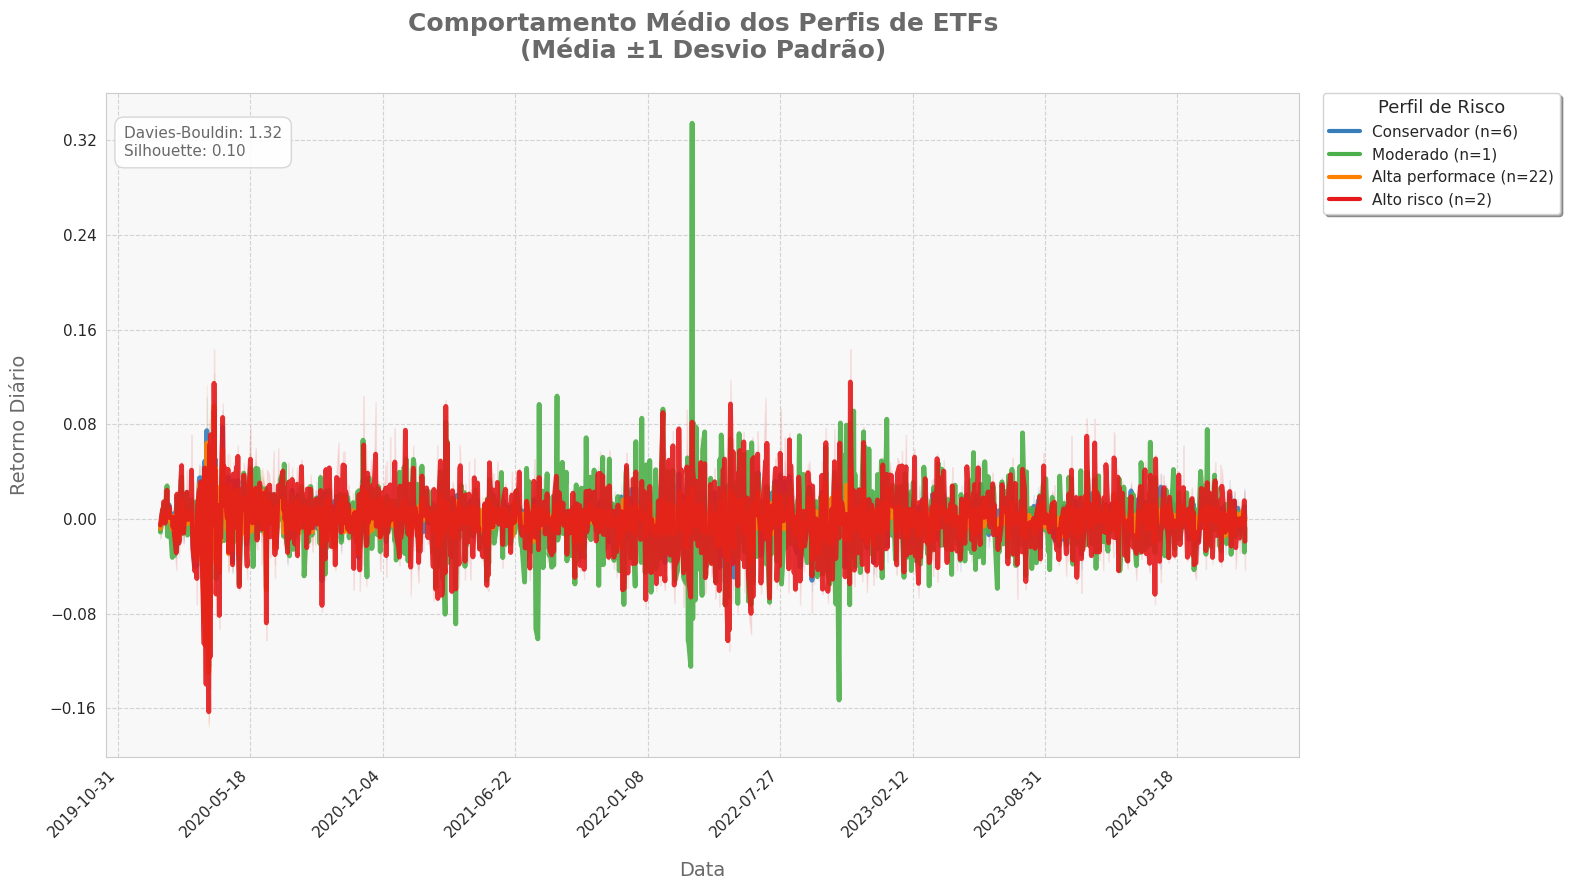

In [11]:


# 1. Defina os ETFs e suas categorias
etfs = {
    "SPY": "USA",
    "EWZ": "Brazil",
    "EEM": "Emerging Markets",
    "VEU": "World ex-USA",
    "VGK": "Europe",
    "EWJ": "Japan",
    "EWU": "UK",
    "EWC": "Canada",
    "EWA": "Australia",
    "EWT": "Taiwan",
    "EWY": "South Korea",
    "XLF": "Financials",
    "XLK": "Technology",
    "XLE": "Energy",
    "XLY": "Consumer Discretionary",
    "XLV": "Healthcare",
    "XLI": "Industrials",
    "XLRE": "Real Estate",
    "XLB": "Materials",
    "XLU": "Utilities",
    "ARKK": "Disruptive Innovation",
    "IBB": "Biotech",
    "SOXX": "Semiconductors",
    "LIT": "Lithium",
    "PBW": "Clean Energy",
    "KWEB": "China Tech",
    "FDN": "Internet",
    "GLD": "Gold",
    "SLV": "Silver",
    "BUG": "Cybersecurity",
    "ROBO": "Robotics"
}

# 2. Período
inicio = "2020-01-01"
fim = "2024-07-01" # Note que se esta data for executada em um dia futuro, mais dados serão baixados.

# 3. Baixando os preços ajustados
dados = yf.download(list(etfs.keys()), start=inicio, end=fim, group_by="ticker", auto_adjust=True)
precos = pd.DataFrame({ticker: dados[ticker]["Close"] for ticker in etfs})

# 4. Calculando retornos logarítmicos diários
retornos = np.log(precos / precos.shift(1)).dropna()

# 5. Clusterização baseada no comportamento diário (retornos)
retornos_t = retornos.T
scaler_behavior = StandardScaler()
retornos_scaled_behavior = scaler_behavior.fit_transform(retornos_t)

n_clusters_comportamento = 4

# Usamos random_state para garantir que a inicialização do KMeans seja a mesma a cada execução
kmeans_comportamento = KMeans(n_clusters=n_clusters_comportamento, random_state=42, n_init=10)
clusters_comportamento = kmeans_comportamento.fit_predict(retornos_scaled_behavior)

# 6. Defina nomes e cores dos clusters
# AJUSTE: Nome do cluster alterado para 'Alto Retorno' para corresponder ao seu exemplo
nomes_clusters_comportamento = {
    0: "Conservador",
    1: "Moderado",
    2: "Alta performace", # Added missing comma
    3: "Alto risco"
}
cores_clusters = {
    "Conservador": "#377eb8",
    "Moderado": "#4daf4a",
    "Alto Retorno": "#e41a1c"
}

# 7. Crie o DataFrame de resumo
resumo_comportamento = pd.DataFrame({
    "ETF": retornos_t.index,
    "Cluster_Comportamento": clusters_comportamento
})
resumo_comportamento["Perfil_Comportamento"] = resumo_comportamento["Cluster_Comportamento"].map(nomes_clusters_comportamento)
resumo_comportamento["Categoria"] = [etfs[ticker] for ticker in resumo_comportamento["ETF"]]

# Para cálculo das métricas agregadas
resumo_comportamento["Retorno Médio"] = [retornos[ticker].mean() for ticker in resumo_comportamento["ETF"]]
resumo_comportamento["Volatilidade"] = [retornos[ticker].std() for ticker in resumo_comportamento["ETF"]]

resumo_comportamento["Skewness"] = [skew(retornos[ticker].dropna()) for ticker in resumo_comportamento["ETF"]]
resumo_comportamento["Kurtosis"] = [kurtosis(retornos[ticker].dropna(), fisher=True) for ticker in resumo_comportamento["ETF"]]

# 8. Resumo dos clusters
print("\nResumo dos Clusters (baseado no Comportamento Diário):")
print(resumo_comportamento.groupby('Perfil_Comportamento').agg({
    'Retorno Médio': 'mean',
    'Volatilidade': 'mean',
    'Skewness': 'mean',
    'Kurtosis': 'mean',
    'ETF': 'count'
}).rename(columns={'ETF': 'Quantidade'}))

print("\nComposição dos Clusters (baseado no Comportamento Diário):")
for perfil in nomes_clusters_comportamento.values():
    print(f"\nPerfil: {perfil}")
    print(resumo_comportamento[resumo_comportamento["Perfil_Comportamento"] == perfil][['ETF', 'Categoria']].to_string(index=False))
print("="*60)

# 9. Plot do comportamento médio dos clusters
plt.figure(figsize=(18, 9))
sns.set_style("whitegrid", {"grid.linestyle": "--", "grid.color": "lightgray"})
plt.gca().set_facecolor('#F8F8F8')

for perfil in nomes_clusters_comportamento.values():
    cluster_etfs = resumo_comportamento[resumo_comportamento["Perfil_Comportamento"] == perfil]["ETF"]
    if cluster_etfs.empty:
        continue

    media_cluster = retornos[cluster_etfs].mean(axis=1)
    desvio_cluster = retornos[cluster_etfs].std(axis=1)

    # Ensure the color exists in cores_clusters
    color_to_use = cores_clusters.get(perfil, 'gray') # Use gray as a default if color is missing

    plt.plot(
        retornos.index, media_cluster,
        label=f'{perfil} (n={len(cluster_etfs)})',
        linewidth=3.5, color=color_to_use, alpha=0.9
    )
    plt.fill_between(
        retornos.index,
        media_cluster - desvio_cluster,
        media_cluster + desvio_cluster,
        color=color_to_use, alpha=0.10
    )

plt.title('Comportamento Médio dos Perfis de ETFs\n(Média ±1 Desvio Padrão)',
          fontsize=18, pad=25, fontweight='bold', color='dimgray')
plt.xlabel('Data', fontsize=14, labelpad=15, color='dimgray')
plt.ylabel('Retorno Diário', fontsize=14, labelpad=15, color='dimgray')

legenda = plt.legend(title='Perfil de Risco', bbox_to_anchor=(1.02, 1), loc='upper left',
                     borderaxespad=0., fontsize=11, title_fontsize=13,
                     frameon=True, fancybox=True, shadow=True,
                     edgecolor='lightgray')
for i, line in enumerate(legenda.get_lines()):
    line.set_linewidth(3)
    line.set_alpha(1)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

score_db = davies_bouldin_score(retornos_scaled_behavior, clusters_comportamento)
score_sil = silhouette_score(retornos_scaled_behavior, clusters_comportamento)
plt.annotate(f'Davies-Bouldin: {score_db:.2f}\nSilhouette: {score_sil:.2f}',
             xy=(0.015, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor='lightgray', alpha=0.9),
             fontsize=11, ha='left', va='top', color='dimgray')

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('cluster_behavior_plot.png') # Salva o gráfico como um arquivo PNG

# Salva resumo_comportamento em CSV para o usuário
resumo_comportamento.to_csv('resumo_comportamento_ajustado.csv', index=False)

Dados de preços e métricas carregados dos arquivos CSV.
DataFrame 'retornos' pronto para uso.
Shape do DataFrame 'retornos': (1256, 31)
Head do DataFrame 'retornos':
                 SPY       EWZ       EEM  ...       SLV       BUG      ROBO
Date                                      ...                              
2020-01-03 -0.007601 -0.008714 -0.018741  ...  0.001783  0.004020 -0.012041
2020-01-06  0.003808 -0.015540 -0.002451  ...  0.005921  0.021305  0.001661
2020-01-07 -0.002816 -0.000635 -0.000669  ...  0.013486  0.005472  0.000948
2020-01-08  0.005315 -0.004457  0.005788  ... -0.014076  0.009717  0.005670
2020-01-09  0.006758 -0.007688  0.006637  ... -0.012482  0.002840  0.006574

[5 rows x 31 columns]

Avaliação dos Clusters (Métricas - Davies-Bouldin Score - menor é melhor):
K=2: 1.29
K=3: 1.20
K=4: 1.15
K=5: 0.94
K=6: 0.99
K=7: 1.11
K=8: 0.79
K=9: 0.75

Avaliação dos Clusters (Métricas - Silhouette Score - maior é melhor):
K=2: 0.30
K=3: 0.26
K=4: 0.25
K=5: 0.25
K=6: 0.26
K

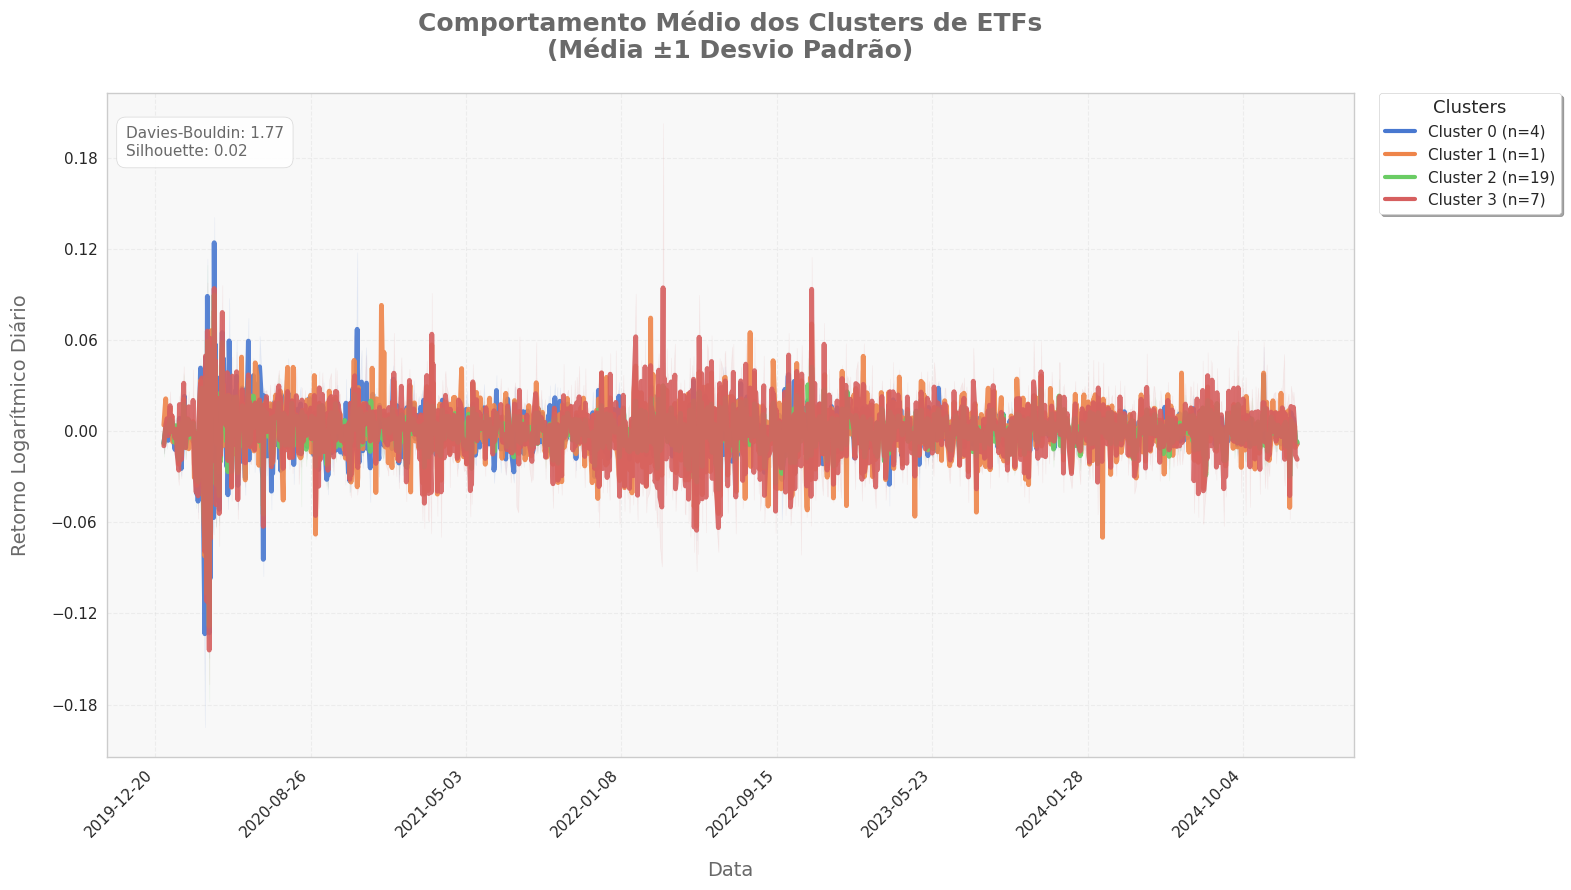

In [39]:
# 1. Importações
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Adicionado conforme script do usuário
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.stats import skew, kurtosis # Adicionado conforme script do usuário

# 2. Lista de ETFs e países/setores (Do primeiro prompt do usuário)
etfs = {
    "SPY": "USA (S&P 500)",
    "EWZ": "Brasil",
    "EWC": "Canadá",
    "ECH": "Chile",
    "GXG": "Colômbia",
    "EWW": "México",
    "EPU": "Peru",

    # Europa
    "VGK": "Europa (Geral)",
    "EWG": "Alemanha",
    "EWO": "Áustria",
    "EWK": "Bélgica",
    "EDEN": "Dinamarca",
    "EWQ": "França",
    "GREK": "Grécia",
    "EIRL": "Irlanda",
    "EWI": "Itália",
    "EWN": "Holanda",
    "EPOL": "Polônia",
    "EWP": "Espanha",
    "EWD": "Suécia",
    "EWL": "Suíça",
    "EWU": "Reino Unido",

    # Ásia e Oceania
    "EWA": "Austrália",
    "FXI": "China", # Ou "MCHI" para MSCI China
    "EWH": "Hong Kong",
    "INDA": "Índia",
    "EIDO": "Indonésia",
    "EIS": "Israel",
    "EWJ": "Japão",
    "EWM": "Malásia",
    "EPHE": "Filipinas",
    "KSA": "Arábia Saudita",
    "EWS": "Singapura",
    "EWY": "Coreia do Sul",
    "EWT": "Taiwan",
    "THD": "Tailândia",
    "TUR": "Turquia",
    "UAE": "Emirados Árabes Unidos",
    "VNM": "Vietnã",

    # África
    "EZA": "África do Sul",

    # Regionais / Múltiplos Países
    "EEM": "Mercados Emergentes",
    "VEU": "Mundo (exceto EUA)",
    "ACWI": "Mundo (All Country World Index)",
    "SPDW": "Países Desenvolvidos (exceto EUA)",
}

# Definir datas de início e fim para download (consistente com uso anterior)
inicio = '2019-01-01'
fim = '2024-07-01'

try:
    precos = pd.read_csv("etf_precos_ajustados.csv", index_col='Date', parse_dates=True)
    resumo = pd.read_csv("etf_features_risco_retorno.csv")
    print("Dados de preços e métricas carregados dos arquivos CSV.")
except FileNotFoundError:
    print("Arquivos CSV de dados não encontrados. Baixando e processando dados com yfinance...")

    dados = yf.download(list(etfs.keys()), start=inicio, end=fim, group_by="ticker", auto_adjust=True)


    precos = pd.DataFrame()
    for ticker in etfs.keys():
        if (ticker, 'Close') in dados.columns:
            precos[ticker] = dados[ticker]["Close"]
        elif ticker in dados.columns and 'Close' not in dados.columns:
             precos[ticker] = dados[ticker]

    precos.dropna(axis=1, how='all', inplace=True) # Remove colunas de ETFs que não foram encontrados ou estão vazias
    precos.to_csv("etf_precos_ajustados.csv") # Salva os preços para uso futuro sem download
    print("Preços ajustados salvos em 'etf_precos_ajustados.csv'.")

    # Calcula retorno logarítmico diário
    retornos_calc = np.log(precos / precos.shift(1)).dropna() # Usa retornos_calc para evitar conflito com 'retornos' já existente em 'locals()'

    # DataFrame final com as métricas (resumo)
    resumo = pd.DataFrame(columns=["ETF", "Categoria", "Retorno Médio", "Volatilidade", "Skewness", "Kurtosis"])
    for ticker, categoria in etfs.items():
        if ticker in retornos_calc.columns: # Garante que o ticker está nos retornos calculados
            serie = retornos_calc[ticker].dropna()
            if not serie.empty: # Garante que a série não está vazia para calcular as métricas
                resumo.loc[len(resumo)] = [ticker, categoria, serie.mean(), serie.std(), skew(serie), kurtosis(serie, fisher=True)]
    resumo.to_csv("etf_features_risco_retorno.csv", index=False) # Salva as métricas
    print("Métricas calculadas e salvas em 'etf_features_risco_retorno.csv'.")


if 'retornos_calc' not in locals(): # Se não foi calculado na exceção (ou seja, carregou de CSV)
    print("Calculando 'retornos' a partir dos preços carregados.")
    retornos = np.log(precos / precos.shift(1)).dropna()
else:
    retornos = retornos_calc # Se foi calculado na exceção, já temos 'retornos_calc'

print("DataFrame 'retornos' pronto para uso.")
print(f"Shape do DataFrame 'retornos': {retornos.shape}")
print(f"Head do DataFrame 'retornos':\n{retornos.head()}")

# Clusterização e Visualização

# Filtra o resumo para apenas os ETFs que têm dados de retorno válidos
resumo = resumo[resumo['ETF'].isin(retornos.columns)].set_index('ETF')

# Clusterização baseada nas métricas de risco-retorno
X_metrics = resumo[["Retorno Médio", "Volatilidade", "Skewness", "Kurtosis"]]
scaler_metrics = StandardScaler()
X_scaled_metrics = scaler_metrics.fit_transform(X_metrics)

scores_dbi_metrics = []
scores_sil_metrics = []
wcss_metrics = []
range_clusters_metrics = range(2, 10)

for k in range_clusters_metrics:
    kmeans_metrics = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto'
    labels_metrics = kmeans_metrics.fit_predict(X_scaled_metrics)
    scores_dbi_metrics.append(davies_bouldin_score(X_scaled_metrics, labels_metrics))
    scores_sil_metrics.append(silhouette_score(X_scaled_metrics, labels_metrics))
    wcss_metrics.append(kmeans_metrics.inertia_)

# Plot Elbow Method for metrics
plt.figure(figsize=(10, 6))
plt.plot(range_clusters_metrics, wcss_metrics, marker='o')
plt.title('Método do Cotovelo (Métricas)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_method_metrics.png')
plt.close()

print("\nAvaliação dos Clusters (Métricas - Davies-Bouldin Score - menor é melhor):")
for k, score in zip(range_clusters_metrics, scores_dbi_metrics):
    print(f"K={k}: {score:.2f}")

print("\nAvaliação dos Clusters (Métricas - Silhouette Score - maior é melhor):")
for k, score in zip(range_clusters_metrics, scores_sil_metrics):
    print(f"K={k}: {score:.2f}")


min_dbi_index_metrics = np.argmin(scores_dbi_metrics)
n_clusters_metrics = range_clusters_metrics[min_dbi_index_metrics] # Let's stick with DB choice
print(f"\nNúmero ótimo de clusters para as métricas (baseado em Davies-Bouldin): {n_clusters_metrics}")

kmeans_metrics_final = KMeans(n_clusters=n_clusters_metrics, random_state=42, n_init='auto') # n_init='auto'
resumo["Cluster_Metricas"] = kmeans_metrics_final.fit_predict(X_scaled_metrics)

# Clusterização baseada no comportamento (retornos diários)
# Transpor os retornos para que as linhas sejam os ETFs e as colunas sejam os dias (features temporais)
retornos_t = retornos.T
scaler_behavior = StandardScaler()
retornos_scaled_behavior = scaler_behavior.fit_transform(retornos_t)

scores_dbi_behavior = []
scores_sil_behavior = []
wcss_behavior = []
range_clusters_behavior = range(2, 10)

for k in range_clusters_behavior:
    kmeans_behavior = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto'
    labels_behavior = kmeans_behavior.fit_predict(retornos_scaled_behavior)
    scores_dbi_behavior.append(davies_bouldin_score(retornos_scaled_behavior, labels_behavior))
    scores_sil_behavior.append(silhouette_score(retornos_scaled_behavior, labels_behavior))
    wcss_behavior.append(kmeans_behavior.inertia_) # WCSS calculation

# Plot Elbow Method for behavior
plt.figure(figsize=(10, 6))
plt.plot(range_clusters_behavior, wcss_behavior, marker='o')
plt.title('Método do Cotovelo (Comportamento Temporal)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_method_behavior.png')
plt.close()

print("\nAvaliação dos Clusters (Comportamento Temporal - Davies-Bouldin Score - menor é melhor):")
for k, score in zip(range_clusters_behavior, scores_dbi_behavior):
    print(f"K={k}: {score:.2f}")

print("\nAvaliação dos Clusters (Comportamento Temporal - Silhouette Score - maior é melhor):")
for k, score in zip(range_clusters_behavior, scores_sil_behavior):
    print(f"K={k}: {score:.2f}")

# Usar K=4
n_clusters_behavior = 4
print(f"\nNúmero de clusters para o comportamento (fixado em K={n_clusters_behavior}, conforme solicitação): {n_clusters_behavior}")

kmeans_behavior_final = KMeans(n_clusters=n_clusters_behavior, random_state=42, n_init='auto') # n_init='auto'
clusters_behavior = kmeans_behavior_final.fit_predict(retornos_scaled_behavior)

# Criar DataFrame com os resultados de comportamento e juntar com as métricas
# Assegura que o índice de 'resumo' seja os tickers para o merge
resumo_comportamento = resumo.copy().reset_index().set_index('ETF')
resumo_comportamento["Comportamento_Cluster"] = pd.Series(clusters_behavior, index=retornos_t.index)

print("\nResumo dos Clusters (baseado em Comportamento Diário):")
print(resumo_comportamento.groupby('Comportamento_Cluster').agg({
    'Retorno Médio': 'mean',
    'Volatilidade': 'mean',
    'Skewness': 'mean',
    'Kurtosis': 'mean',
    'Categoria': lambda x: ', '.join(x.unique()) # Para mostrar as categorias presentes no cluster
}).rename(columns={'Categoria': 'Categorias (Exemplo)'}))

# Para contar ETFs por cluster após o groupby, pode-se fazer de outra forma
cluster_counts = resumo_comportamento.groupby('Comportamento_Cluster').size().reset_index(name='Count')
print("\nContagem de ETFs por Cluster baseado em Comportamento Diário:")
print(cluster_counts)


print("\nComposição dos Clusters (baseado em Comportamento Diário):")
for cluster in sorted(resumo_comportamento['Comportamento_Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    # Garante que 'Categoria' está sendo selecionada corretamente para o relatório
    cluster_data = resumo_comportamento[resumo_comportamento['Comportamento_Cluster'] == cluster]
    print(cluster_data[['Categoria']].to_string())

print("="*60)


# Plotagem Comportamento Médio dos Clusters com Desvio Padrão
plt.figure(figsize=(18, 9))

# Paleta de cores minimalista (Seaborn 'muted' ou 'pastel' ou 'Greys')
minimalist_palette = sns.color_palette("muted", n_clusters_behavior)
cluster_colors_final_aesthetic = [minimalist_palette[i] for i in range(n_clusters_behavior)]

sns.set_style("whitegrid", {"grid.linestyle": "--", "grid.color": "lightgray"})
plt.gca().set_facecolor('#F8F8F8')

# Loop para plotar cada cluster
for cluster in range(n_clusters_behavior):
    # Pega os tickers do cluster de comportamento
    cluster_etfs_series = resumo_comportamento[resumo_comportamento['Comportamento_Cluster'] == cluster].index
    if cluster_etfs_series.empty:
        continue

    # Filtra os retornos apenas para os ETFs deste cluster
    # Garante que os tickers existem no DataFrame de retornos temporais
    valid_cluster_etfs = [etf for etf in cluster_etfs_series if etf in retornos.columns]

    if valid_cluster_etfs:
        cluster_mean = retornos[valid_cluster_etfs].mean(axis=1)
        cluster_std = retornos[valid_cluster_etfs].std(axis=1)

        plt.plot(retornos.index, cluster_mean,
                 label=f'Cluster {cluster} (n={len(valid_cluster_etfs)})',
                 linewidth=3.5, color=cluster_colors_final_aesthetic[cluster], alpha=0.9)

        plt.fill_between(retornos.index,
                         cluster_mean - cluster_std,
                         cluster_mean + cluster_std,
                         color=cluster_colors_final_aesthetic[cluster], alpha=0.08)

# Título e rótulos
plt.title('Comportamento Médio dos Clusters de ETFs\n(Média ±1 Desvio Padrão)',
          fontsize=18, pad=25, fontweight='bold', color='dimgray')
plt.xlabel('Data', fontsize=14, labelpad=15, color='dimgray')
plt.ylabel('Retorno Logarítmico Diário', fontsize=14, labelpad=15, color='dimgray')

# Legenda
legend = plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left',
                    borderaxespad=0., fontsize=11, title_fontsize=13,
                    frameon=True, fancybox=True, shadow=True,
                    edgecolor='lightgray')
for i, line in enumerate(legend.get_lines()):
    line.set_linewidth(3)
    line.set_alpha(1)

# Ticks dos eixos
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(8))

db_score_behavior = davies_bouldin_score(retornos_scaled_behavior, clusters_behavior)
sil_score_behavior = silhouette_score(retornos_scaled_behavior, clusters_behavior)

plt.annotate(f'Davies-Bouldin: {db_score_behavior:.2f}\nSilhouette: {sil_score_behavior:.2f}',
             xy=(0.015, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor='lightgray', alpha=0.9),
             fontsize=11, ha='left', va='top', color='dimgray')

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.savefig('cluster_time_series_behavior.png')
plt.show()

